In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
from string import letters
from sklearn import linear_model
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('prostate.csv')

In [3]:
data[['lcavol', 
      'lweight', 
      'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa']] = data[['lcavol', 
      'lweight', 
      'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa']].apply(lambda x: scale(x))
data['train'] = data['train'].map({'T': 1, 'F': 0})
train = data[data['train'] == 1]
test = data[data['train'] == 0]

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
train_X = train.drop(['id', 'lpsa', 'train'],1)
train_y = train[['lpsa']]

In [5]:
test_X = test.drop(['id', 'lpsa', 'train'], 1)
test_y = test[['lpsa']]

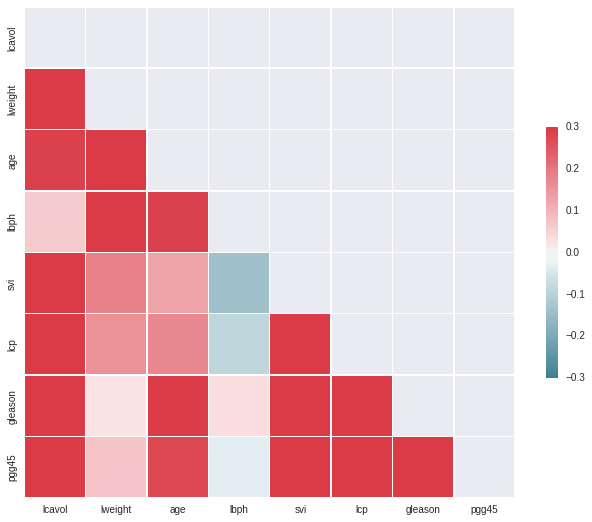

In [6]:
corr = train_X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

sns.plt.show()

In [7]:
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
print("Linear Regression coef_:")
print regr.coef_
print("\nLinear Regression intercept_:")
print regr.intercept_

Linear Regression coef_:
[[ 0.58867801  0.22788395 -0.12255156  0.18205082  0.26439653 -0.24992247
  -0.01845664  0.23126487]]

Linear Regression intercept_:
[-0.01171576]


In [8]:
print("Mean squared error: %.4f"
      % np.mean((regr.predict(test_X) - test_y) ** 2))

Mean squared error: 0.3953


In [9]:
regr1 = linear_model.Ridge()
regr1.fit(train_X, train_y)
print("Ridge Regression coef_:")
print regr1.coef_
print("\nRidge Regression intercept_:")
print regr1.intercept_

Ridge Regression coef_:
[[ 0.56906083  0.22786378 -0.11672946  0.17991419  0.25906171 -0.22303664
  -0.01049205  0.21589929]]

Ridge Regression intercept_:
[-0.01102372]


In [10]:
print("Mean squared error: %.4f"
      % np.mean((regr1.predict(test_X) - test_y) ** 2))

Mean squared error: 0.3888
